# Cluster Analysis

## 1) K-Means

In [2]:
# Importando librerías
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [3]:
# Cargando base de "iris"
iris = datasets.load_iris()

In [15]:
for name, dict_ in iris.items():
    print(dict_)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [19]:
# Forma de la data
print(iris.data.shape)

(150, 4)


In [21]:
# Separando la base
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

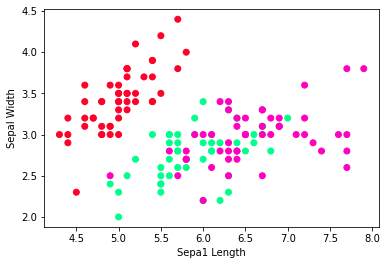

In [24]:
# Visualización tomando de comparativa dos variables
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepa1 Length')
plt.ylabel('Sepal Width')

**Hyper-Parámetros**:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [27]:
# Creando objeto del modelo
kmean = KMeans(n_clusters = 3, random_state=1)

# Ajustando la data
kmean.fit(X)
KMeans(algorithm='auto', 
       copy_x=True, 
       init='k-means++',
       max_iter=300,
       n_clusters=3, 
       n_init=10, 
       random_state=1, 
       tol=0.0001,
       verbose=0)

KMeans(algorithm='auto', n_clusters=3, random_state=1)

In [30]:
# Centros de los clústers
centers = kmean.cluster_centers_
print(centers)

[[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]


Text(0.5, 1.0, 'Predicted')

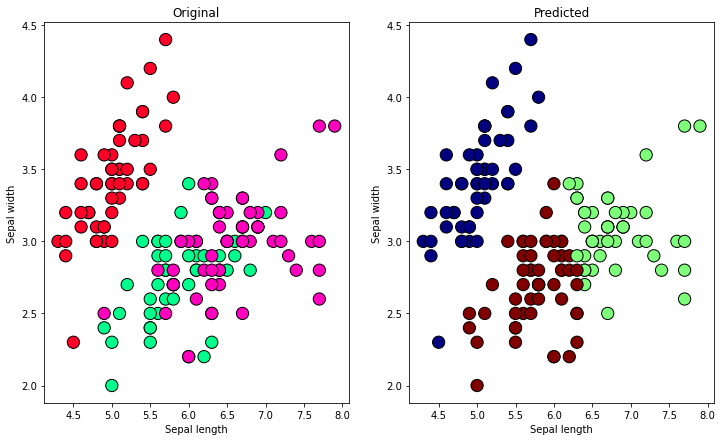

In [31]:
# Gráficar los clústers, y comparar con lo real
new_labels = kmean.labels_

fig, axes = plt.subplots(1, 2, figsize=(12,7))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal width')
axes[0].set_title('Original')
axes[1].set_title('Predicted')

## 2) Agglomerative Clustering

In [119]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Genera random data
from sklearn.datasets import make_blobs

**Lo que está en color no vienen de un clustering model, sólo es para fines ilustrativos!**

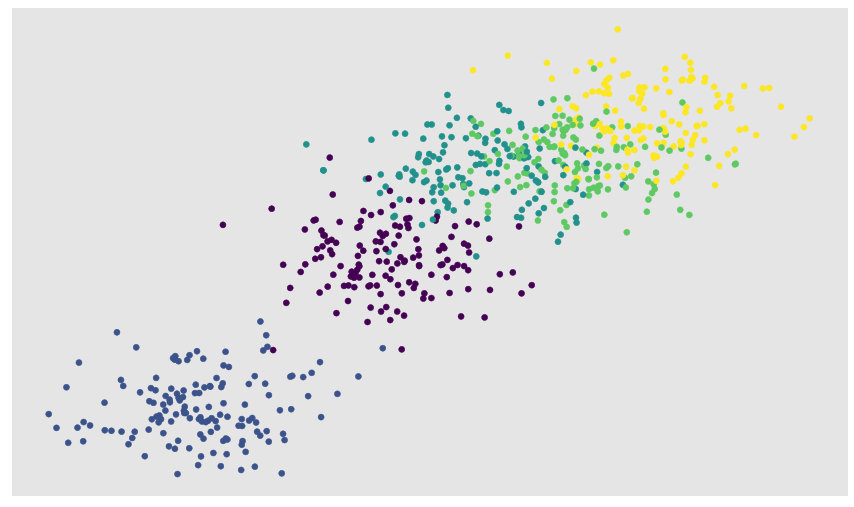

In [120]:
# Esto es data ficticia que se está creando para que se vea tal cual
X, y = make_blobs(n_samples=700,
                  # Está generando centroides en donde se generará la random data
                  centers=[[3,3],
                           [-1, -3],
                           [5,7],
                           [7,7],
                           [9,9]],
                  # Standard Desv de cada cluster
                  cluster_std=1.3)

plt.style.use("ggplot")

plt.figure(figsize=(15,9))

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xticks([])
plt.yticks([])

plt.show()

In [121]:
# Establecer los hyper-parámetros del modelo
agglomerative_cluster = AgglomerativeClustering(
                                                n_clusters=5,
                                                affinity="euclidean",
                                                linkage="average"
                                               )

# Fitting the Model with data
agglomerative_cluster.fit(X, y)

AgglomerativeClustering(linkage='average', n_clusters=5)

**Ya aquí sí se establecen los clústers según el Aglomerativo que se estableció**

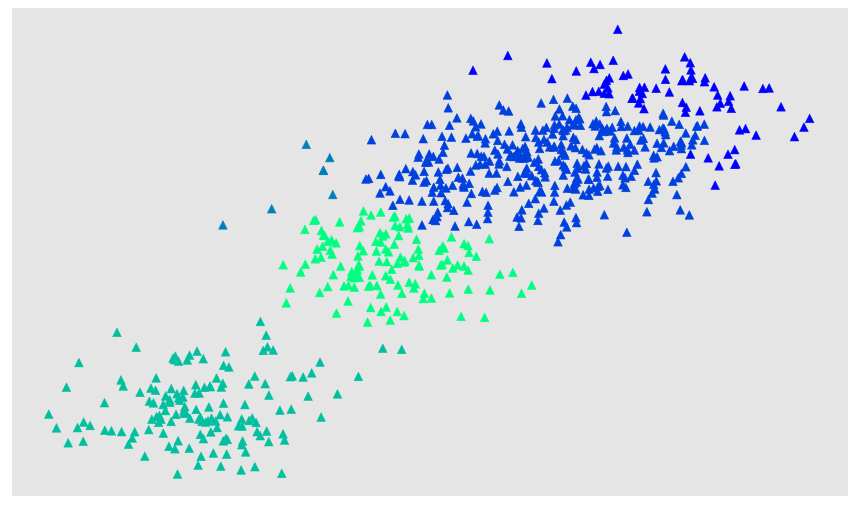

In [122]:
# Aquí se sacan los clústers según el modelo aglomerativo
plt.style.use("ggplot")

plt.figure(figsize=(15,9))

plt.scatter(
            X[:, 0],
            X[:, 1],
            c = agglomerative_cluster.labels_,
            cmap = "winter",
            marker = "^",
            s = 75
           )

plt.xticks([])
plt.yticks([])
plt.show()

**Otra forma de visualizarlo**

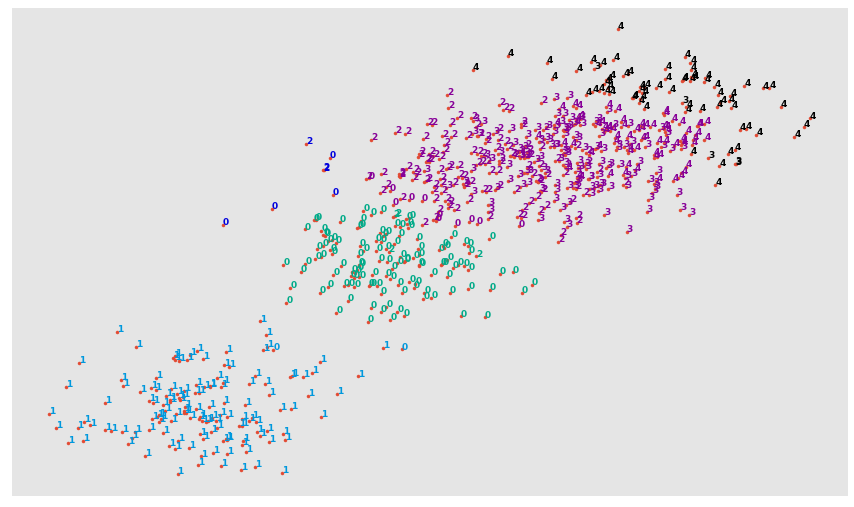

In [124]:
plt.figure(figsize=(15,9))

# De esta manera es cómo se ponen los números
for i in range(X.shape[0]):
    plt.text(X[i, 0], X[i, 1], str(y[i]),
             color=plt.cm.nipy_spectral(agglomerative_cluster.labels_[i] / 10),
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xticks([])
plt.yticks([])    

plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

/var/folders/dc/glgt2cgj2r37zhhr4wjp9_880000gq/T/ipykernel_94018/3685870510.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  graph = hierarchy.linkage(y = distance, method = "average" )


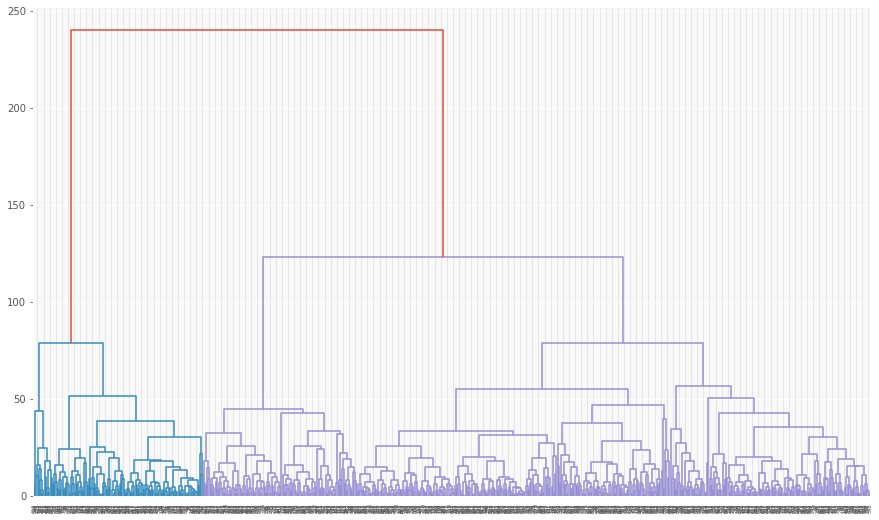

In [128]:
# Matriz de distancia
distance = distance_matrix(X, X)

# Creando el dendograma
plt.figure(figsize=(15,9))
graph = hierarchy.linkage(y = distance, method = "average" )
dendro = hierarchy.dendrogram(graph)
plt.show()

## 3) DBSCAN

In [36]:
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer

In [ ]:
# Descargando la información
data = fetch_20newsgroups(subset='all')['data']

In [35]:
data[1]

'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which high-performance VLB video card?\nSummary: Seek recommendations for VLB video card\nNntp-Posting-Host: midway.ecn.uoknor.edu\nOrganization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA\nKeywords: orchid, stealth, vlb\nLines: 21\n\n  My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-performance VLB card\n\n\nPlease post or email.  Thank you!\n\n  - Matt\n\n-- \n    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   \n  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- \n    |   of heaven, because everything he does is right and all his ways  |   \n    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   \n'

**Transfer Learning**:

* Distilbert: Modelo de aprendizaje de transferencia preentrenado en el procesamiento del lenguaje natural (NLP).

https://huggingface.co/docs/transformers/model_doc/distilbert

In [37]:
# Transformando los documentos a datos numéricos, aquí se descarg un model pe-entrenado
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

**Embeddings**: 
Los métodos de incrustación (también denominados "codificación", "vectorización", etc.) convierten representaciones simbólicas (es decir, palabras, emojis, elementos categóricos, fechas, horas, otras características, etc.) en números significativos (es decir, números reales que capturan las relaciones semánticas subyacentes). entre los símbolos).

In [43]:
# embedding transforma de palabras a números
print(embeddings.shape)
embeddings

(18846, 768)


array([[ 0.20808774, -0.29548568,  0.42035064, ...,  0.22280738,
         0.20041442,  0.3248367 ],
       [-0.45604035, -0.3692013 ,  0.5576495 , ...,  0.5806514 ,
         0.23162358, -0.8086029 ],
       [-0.5223873 , -0.3920859 , -0.3951972 , ..., -0.43376943,
         0.5196812 , -0.3027191 ],
       ...,
       [ 0.12062742, -0.44312298,  0.23431587, ...,  0.50207686,
        -0.24836995, -0.18186855],
       [-0.68594867,  0.20820892,  1.1398733 , ..., -0.16980757,
         0.56880057,  0.25217998],
       [-0.3179719 , -0.0468239 , -0.2969052 , ...,  0.15590732,
         0.16240296, -0.33358833]], dtype=float32)

**UMAP Feature reduction method**:

In [53]:
# Dimensionality reduction UMAP
#pip install umap-learn
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

In [72]:
# Así queda la nueva tabla
pd.DataFrame(umap_embeddings).head(5)

,0,1,2,3,4
0,0.273208,0.057241,9.953871,1.871593,9.548865
1,1.755627,0.722725,9.357640,-0.535944,7.264525
2,-0.683741,-2.109820,9.348142,5.841779,9.722528
3,1.217923,-0.235605,7.340039,0.482093,8.115234
4,1.963486,0.685748,10.335212,0.421650,8.423324


**HDBSCAN Density-based Clustering**: 
Es un algoritmo basado en la densidad que funciona bastante bien con UMAP.

In [55]:
# Aquí se guarda el modelo
#pip install hdbscan
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


**Model Visualization**:

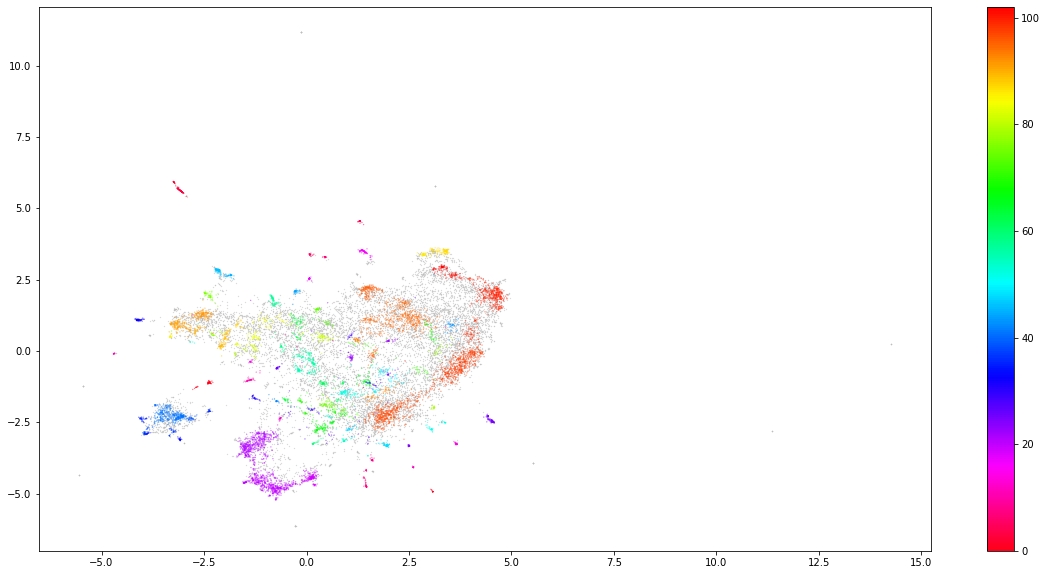

In [75]:
import matplotlib.pyplot as plt

# Aquí se hace una reducción de dos componentes para graficarlo
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])

# Etiqueta de los clusters resultantes
result['labels'] = cluster.labels_

# Visuaización
fig, ax = plt.subplots(figsize=(20, 10))

# HDBSCAN establece que los outliers son el grupo "-1"
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()
plt.show()

In [69]:
# Tabla final
pd.DataFrame(umap_data)

,0,1
0,-1.296632,1.415539
1,3.434798,1.103871
2,-6.722486,0.224721
3,-0.100977,-1.369698
4,1.878751,1.847585
...,...,...
18841,3.337681,2.027853
18842,1.379651,-0.509219
18843,2.127925,2.163274
18844,1.180391,1.755927


**¿Cómo podemos construir tópicos basado en esto?**

**c-TF-IDF**: Es un modelo semi-supervisado que predice clases antes no vistas sólo usando la similaridad del coseno.

In [76]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [80]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    # se eliminan stop words
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    # método en parte basado al conteo de frecuencia de palabras
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

**Lo que sigue es tomar las 20 palabras más relevantes para cada tópico, y de allí analizar qué sale relevante en cada grupo.**

In [85]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

/Users/jpolanco/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic,Size
0,-1,10866
21,20,566
99,98,552
22,21,511
96,95,476
98,97,475
101,100,400
42,41,363
97,96,198
92,91,163


In [104]:
top_n_words[20][:10]

[('hockey', 0.016474985359234695),
 ('nhl', 0.012822035692706835),
 ('team', 0.012258965447374688),
 ('game', 0.01213426477269898),
 ('25', 0.011027144514108777),
 ('55', 0.010961486483560406),
 ('pit', 0.010792962185526339),
 ('play', 0.009544076583437004),
 ('det', 0.00950413475179347),
 ('period', 0.00912429119728966)]

In [112]:
top_n_words[33][:10]

[('space', 0.03747615276223046),
 ('nasa', 0.020021425200739244),
 ('shuttle', 0.01703269833608712),
 ('planetary', 0.014823741010863778),
 ('mars', 0.013945610518634364),
 ('lunar', 0.013891515101936239),
 ('missions', 0.012815116640200061),
 ('orbit', 0.012624015492571316),
 ('mission', 0.012609626754547857),
 ('probe', 0.011837428033445811)]